# 03 Norm and distance

<img src="figs/03_dist_points.png" alt="Drawing" width=450px/>

<center>Alzheimer's and Healthy</center>

<img src="figs/03_dist_brains.png" alt="Drawing" width=450px/>
<img src="figs/03_dist_conn.png" alt="Drawing" width=450px/>

#### Unit 1: Vectors, Book ILA Ch. 1-5
- 01 Vectors
- 02 Linear Functions
- **_03 Norms and Distances_**
- 04 Clustering
- 05 Linear Independence

#### Unit 2: Matrices, Book ILA Ch. 6-11 + Book IMC Ch. 2
#### Unit 3: Least Squares, Book ILA Ch. 12-14 + Book IMC Ch. 8
#### Unit 4: Eigen-decomposition, Book IMC Ch. 10, 12, 19

# Outline: 03 Norms and Distances

- [Norm](#sec-norm)
- [Distance](#sec-distance)
- [Standard deviation](#sec-sd)
- [Angle](#sec-angle)

# Outline: 03 Norms and Distances

- **[Norm](#sec-norm)**
- [Distance](#sec-distance)
- [Standard deviation](#sec-sd)
- [Angle](#sec-angle)

# Norm

$\color{#EF5645}{\text{Definition}}$: The Euclidean norm, or just norm, of an $n$-vector $x$ is:
$$||x|| = \sqrt{x_1^2 + ... + x_n^2} = \sqrt{x^Tx}$$

$\color{#EF5645}{\text{Remarks}}$: The norm:
- is used to measure the size of a vector
- reduces to the absolute value for scalar, i.e. for $n=1$.

# Norm

$\color{#6D7D33}{\text{Properties}}$: For any scalar $\beta$ and any $n$-vectors $x, y$:
1. Homogeneity: $||\beta x|| = |\beta|||x||$
2. Triangle inequality: $||x+y|| \leq ||x|| + ||y||$
3. Nonnegative: $||x|| \geq 0$
4. Definite: $||x|| = 0$ if and only if $x = 0$

$\color{#047C91}{\text{Exercise (at home)}}$: Show Prop. 1, 3, 4. Verify Prop. 2 in Python.

# Norm

$\color{#003660}{\text{In Python}}$, the module `linalg` from `numpy` has a function computing the norm.

In [8]:
import numpy as np

x = np.array([2, -1, 2])

print(np.sqrt(np.sum(x ** 2)))
print(np.linalg.norm(x))
print(np.sqrt((np.inner(x, x))))

3.0
3.0
3.0


# Root Mean Square (RMS) value

$\color{#EF5645}{\text{Definition}}$: The mean-square value of an $n$-vector $x$ is:
$$\frac{x_1^2 + ... + x_n^2}{n} = \frac{||x||^2}{n}.$$

$\color{#EF5645}{\text{Definition}}$: The root-mean-square (RMS) value of an $n$-vector $x$ is:
$$rms(x) = \sqrt{\frac{x_1^2 + ... + x_n^2}{n}} = \frac{||x||}{\sqrt{n}}.$$

$\color{#EF5645}{\text{Remarks}}$: rms(x) gives "typical" values of $|x_i|$: e.g. rms($1_n$) = 1

$\color{#047C91}{\text{Exercise}}$: Write a function computing the root-mean-square value in Python.

In [10]:
def rms(x):
    return np.linalg.norm(x) / np.sqrt(len(x))

ones = np.ones(4)
rms(ones)

1.0

$\color{#003660}{\text{In Python}}$, we can visualize the RMS value using `matplotlib`.

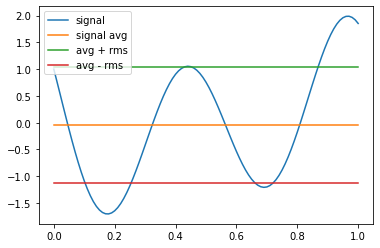

In [11]:
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 101); x = np.cos(8 * t) - 2 * np.sin(11 * t)
plt.plot(t, x); plt.plot(t, np.average(x) * np.ones(len(x)))
plt.plot(t, (np.average(x) + rms(x)) * np.ones(len(x)))
plt.plot(t, (np.average(x) - rms(x)) * np.ones(len(x)))
plt.legend(('signal', 'signal avg', 'avg + rms', 'avg - rms'), 
           loc='upper left');

# Chebyshev inequality

$\color{#6D7D33}{\text{Proposition}}$: Consider an $n$-vector $x$. The Chebyshev inequality states:
$$\#\{|x_i| \geq a\} \leq \left(\frac{||x||}{a}\right)^2,$$
i.e. the number of entries $x_i$ such that $|x_i| \geq a$ is no more than $\left(\frac{||x||}{a}\right)^2$, i.e.:
$$\frac{\#\{|x_i| \geq a\}}{n} \leq \left(\frac{rms(x)}{a}\right)^2,$$
i.e. the fraction of entries $x_i$ such that $|x_i| \geq a$ is no more than $\left(\frac{rms(x)}{a}\right)^2$.



$\color{#047C91}{\text{Example}}$: With $a = 5 rms(x)$, we see that in any vector $x$, no more than 4\% of entries can satisfy $|x_i| \geq 5 rms(x)$.

# Outline: 03 Norms and Distances

- [Norm](#sec-norm)
- **[Distance](#sec-distance)**
- [Standard deviation](#sec-sd)
- [Angle](#sec-angle)

# Distance

$\color{#EF5645}{\text{Definition}}$: The Euclidean distance, or just distance, between $n$-vectors $a$ and $b$ is:
$$dist(a, b) = ||a - b||.$$

This definition agrees with ordinary distance for $n = 1, 2, 3.$

$\color{#EF5645}{\text{Definition}}$: The RMS deviation between the $n$-vectors $a$ and $b$ is defined as: 
$$rms(a - b).$$

$\color{#003660}{\text{In Python}}$, we can compute distances using the `norm` function.

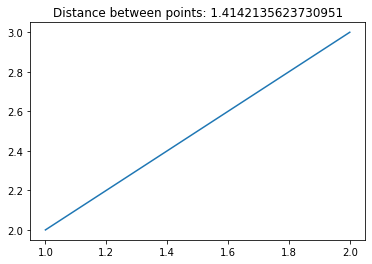

In [15]:
a = np.array([1, 2])
b = np.array([2, 3])

plt.plot([a[0], b[0]], [a[1], b[1]])
plt.title(f"Distance between points: {np.linalg.norm(a - b)}");

# Triangle inequality

- Remember the triangle inequality: $||x+y|| \leq ||x|| + ||y||$
- Apply with: $x = a - b$ and $y = b - c$ and get:
$$||a - c|| \leq ||a - b|| + ||b - c||.$$
i.e. the third edge is not longer than the sum of the other two.
<center><img src="figs/03_triangle.jpg" alt="Drawing" width=450px/></center>

$\color{#003660}{\text{In Python}}$, we can use a notion of distance to compute differences between more complex data.

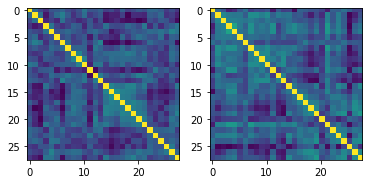

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import geomstats.datasets.utils as ds
data, patient_ids, labels = ds.load_connectomes()
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(121); imgplot = ax.imshow(data[0])
ax = fig.add_subplot(122); imgplot = ax.imshow(data[1])

We verify that two schizophrenic subjects are "closer" than a schizophrenic subject and a healthy control.

In [17]:
print(labels)
healthy = data[0]; schiz1 = data[1]; schiz2 = data[2]
print(f"Dist healthy-schizophrenic: {np.linalg.norm(healthy - schiz1):1.2}")
print(f"Dist between 2 schizophrenics: {np.linalg.norm(schiz1 - schiz2):1.2}")

[1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1
 0 0 0 1 1 1 0 0 0 1 0 1]
Dist healthy-schizophrenic: 5.3
Dist between 2 schizophrenics: 4.5


# Nearest Neighbor

$\color{#EF5645}{\text{Definition}}$: If $z_1, . . . , z_m$ is a list of $n$-vectors, $z_j$ is the nearest neighbor of the $n$-vector $x$ if $‖x − z_j ‖ ≤ ‖x − z_i ‖$, for all $i = 1, . . . , m$.

<center><img src="figs/03_nn.jpg" alt="default" width=250px/></center>

$\color{#047C91}{\text{Exercise}}$: Design an algorithm that can predict if a subject is schizophrenic or not.

# Outline: 03 Norms and Distances

- [Norm](#sec-norm)
- [Distance](#sec-distance)
- **[Standard deviation](#sec-sd)**
- [Angle](#sec-angle)

# Standard Deviation

$\color{#EF5645}{\text{Definition}}$: The standard deviation of the $n$-vector $x$ is:
$$std(x) = rms(x - \bar{x}1) = \frac{||x - \bar{x}1. ||}{\sqrt{n}}, \text{ where $\bar{x}$ represents the average of $x$}.$$
The standard deviation gives the typical amount that $x_i$ varies around $\bar{x}.$

$\color{#6D7D33}{\text{Properties}}$:
1. $std(x) = 0$ if and only if $x = \alpha1$ for some scalar $\alpha$.
2. We have: $rms(x)^2 = \bar{x}^2 + std(x)^2$

# Example: Finance

- $x$ is time series of returns on some investment (say, in %),
- $\bar{x}$ = "mean return" over the time period,
- $std(x)$ = how variable is the return = the "risk".

Multiple investments (with different return time series) are:
- compared in terms of return and risk,
- and plotted on a risk-return plot.


$\color{#047C91}{\text{Examples}}$:

<center><img src="figs/03_finance.jpg" alt="default" width=700px/></center>

$\color{#047C91}{\text{Exercise}}$: Show, for return time series $x$ with mean return 8% and risk 3%, that a gain ($x_i \geq 30%$) can occur in no more than 8% of the time. 


# Outline: 03 Norms and Distances

- [Norm](#sec-norm)
- [Distance](#sec-distance)
- [Standard deviation](#sec-sd)
- **[Angle](#sec-angle)**

# Cauchy-Schwarz Inequality

$\color{#6D7D33}{\text{Theorem}}$: For any two $n$-vectors $a$ and $b$, we have the Cauchy-Schwarz inequality:
$$|a^Tb| \leq ||a||||b||.$$

# Angle

$\color{#EF5645}{\text{Definition}}$: The angle between two non-zeros $n$-vectors $a$ and $b$ is:
$$\angle(a, b) = arccos(\frac{a^Tb}{||a||||b||}).$$
It coincides with the ordinary angle in 2D and 3D.

$\color{#6D7D33}{\text{Properties}}$: The angle $\angle(a, b)$ is the number in $[0, \pi]$ that satisfies: $a^Tb = ||a||||b||\cos(\angle(a, b))$

# Classification of angles

Write: $\theta = \angle(a, b)$ 
- $θ = π/2 = 90^\circ$: a and b are orthogonal, written $a ⊥ b$, ($a^T b = 0$) 
- $θ = 0$: a and b are aligned ($a^T b = ‖a‖ ‖b‖$) 
- $θ = π = 180^\circ$: a and b are anti-aligned ($a^T b = −‖a‖ ‖b‖$)
- $θ ≤ π/2 = 90^\circ$: a and b make an acute angle ($a^T b ≥ 0$)
- $θ ≥ π/2 = 90^\circ$: a and b make an obtuse angle ($a^T b ≤ 0$)

<center><img src="figs/03_angles.jpg" alt="default"/></center>


$\color{#003660}{\text{In Python}}$:

In [7]:
import numpy as np
def angle(a, b):
    ...

# Spherical distance

if $a, b$ are on sphere of radius $R$, distance along the sphere is $R∠(a, b)$


<center><img src="figs/03_sphere.jpg" alt="default" width=400px/></center>

# Example: Natural Language Processing (NLP)

- Dissimilarity between two documents measures by angle between "word count vectors"

<center><img src="figs/03_angle_wiki.jpg" alt="default"/></center>

# Outline: 03 Norms and Distances

- [Norm](#sec-norm)
- [Distance](#sec-distance)
- [Standard deviation](#sec-sd)
- [Angle](#sec-angle)

# Resources

- Book ILA Ch. 3